In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

# CV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

In [2]:
data = pd.read_csv('./Data/OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
data.isnull().sum().sort_values(ascending = False)
# No null values!

url                           0
 weekday_is_monday            0
 weekday_is_wednesday         0
 weekday_is_thursday          0
 weekday_is_friday            0
                             ..
 kw_min_avg                   0
 kw_max_avg                   0
 kw_avg_avg                   0
 self_reference_min_shares    0
 shares                       0
Length: 61, dtype: int64

In [3]:
from skimpy import clean_columns
data = clean_columns(data)

60 column names have been cleaned

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['shares', 'url'], axis = 1),
    data['shares'],
    test_size = 0.2,
    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(31715, 59)
(7929, 59)


In [5]:
train = pd.concat([X_train, y_train], axis = 1)

In [27]:
train.corrwith(train.shares).sort_values(ascending = False)

shares                           1.000000
kw_avg_avg                       0.106740
lda_03                           0.085382
kw_max_avg                       0.061870
num_hrefs                        0.046526
self_reference_avg_sharess       0.044519
kw_avg_max                       0.041734
self_reference_min_shares        0.040790
self_reference_max_shares        0.039183
kw_min_avg                       0.037683
num_imgs                         0.037407
global_subjectivity              0.032716
kw_avg_min                       0.031659
kw_max_min                       0.031134
abs_title_sentiment_polarity     0.027584
num_videos                       0.025578
num_keywords                     0.023550
title_subjectivity               0.021779
is_weekend                       0.016948
weekday_is_saturday              0.016492
avg_positive_polarity            0.014755
title_sentiment_polarity         0.012638
n_tokens_title                   0.012481
max_positive_polarity            0

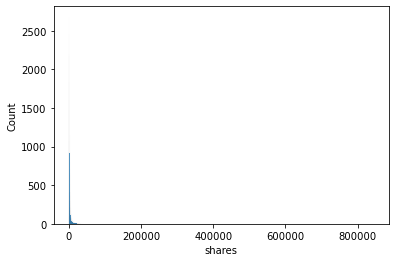

In [21]:
sns.histplot(x = 'shares', data = train);

In [7]:
train_copy = train.copy()

train_copy['day'] = train_copy.apply(lambda x: 'Sunday' if x['weekday_is_sunday'] == 1
                                    else 'Monday' if x['weekday_is_monday'] == 1
                                    else 'Tuesday' if x['weekday_is_tuesday'] == 1
                                    else 'Wednesday' if x['weekday_is_wednesday'] == 1
                                    else 'Thursday' if x['weekday_is_thursday'] == 1
                                    else 'Friday' if x['weekday_is_friday'] == 1
                                    else 'Saturday', axis = 1)

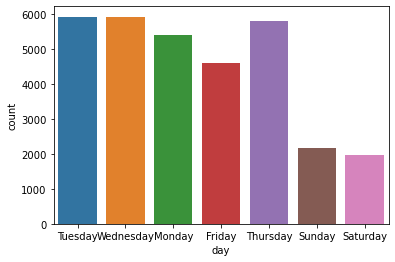

In [12]:
sns.countplot(x = 'day', data = train_copy);

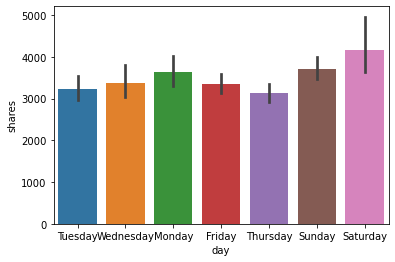

In [18]:
sns.barplot(x = 'day', y = 'shares', data = train_copy);

In [14]:
train_copy['data_channel'] = train_copy.apply(lambda x: 'lifestyle' if x['data_channel_is_lifestyle'] == 1
                                             else 'tech' if x['data_channel_is_tech'] == 1
                                             else 'socmed' if x['data_channel_is_socmed'] == 1
                                             else 'entertainment' if x['data_channel_is_entertainment'] == 1
                                             else 'bus' if x['data_channel_is_bus'] == 1
                                             else 'world', axis = 1)

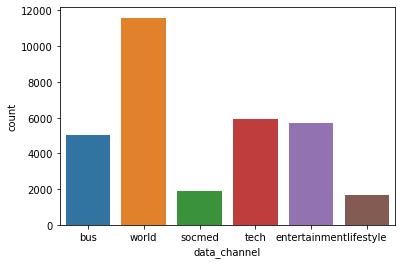

In [15]:
sns.countplot(x = 'data_channel', data = train_copy);

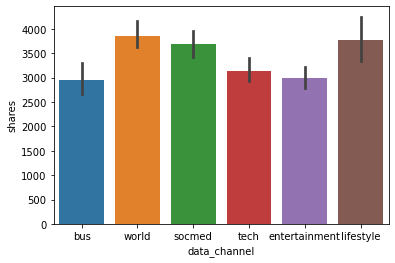

In [19]:
sns.barplot(x = 'data_channel', y = 'shares', data = train_copy);